<a href="https://colab.research.google.com/github/tensorbytes0202/Machine-learning/blob/main/Copy_of_EDA(Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Data analysis process
1.Asking question
2.Data wrangling
 a.Gathering
 b.Assesing
 c.Clean
3.EDA
Dataset ke structure ko samajhna

Patterns aur trends identify karna

Outliers aur missing data detect karna

Hypotheses generate karna

ML model banane se pehle data ko ready karna


4.Conclusions
5.presenting


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/train.csv')

parch = parent child

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Why do EDA
1.Model building


2.Analysis and reporting


3.VAlidate assumptions


4.Handling misiing values


5.feature engineering


6.detecting outliers


In [ ]:
# Remeber it is an iterative process


Column Types
1.Numerical - Age,Fare,PassengerId


2.Categorical- Survived,Pclass,Sex,SibSp,Parch,Embarked


3.Mixed-Name,Ticket,cabin

Univariate Analysis(single variable analysis )
example: Agar tumhare paas students ke marks ka column hai, to univariate

ye batata  h shape,central tendency,dispersion(used to describe range(MAx and MIN value))
identifying potential issues: it analysis the potential problem such as outliers,skewness and missing values
analysis me tum dekhoge:


Average marks kitna hai



Maximum aur minimum marks



Kitne students fail/pass hue



Distribution ka shape (normal hai ya skewed)


Graph bana kar visualize karna

Conclusions : Summarize the findingd of the EDA and make decisions about how to procees with further analysis


AGE


conclusions  

-Age is normally(almost) distributed
-20% of the values are missing
-There are some outliers

In [ ]:
A =df['Age'].describe()

In [ ]:
A


,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


<Axes: ylabel='Frequency'>

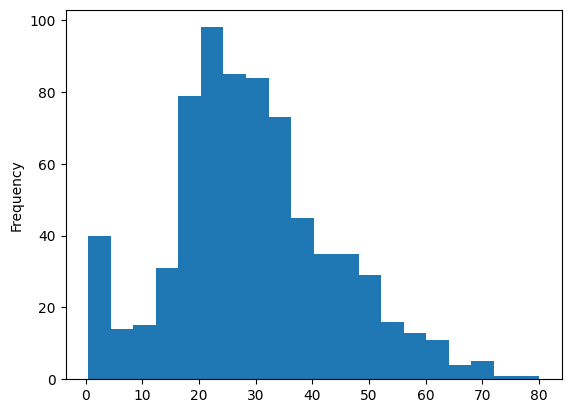

In [ ]:
df['Age'].plot(kind='hist',bins=20)
#Bin Size -: bins=5 means the data range will be divided into 5 equal intervals.
#🔹 Each bar in the histogram shows the frequency of values in that interval.

<Axes: ylabel='Density'>

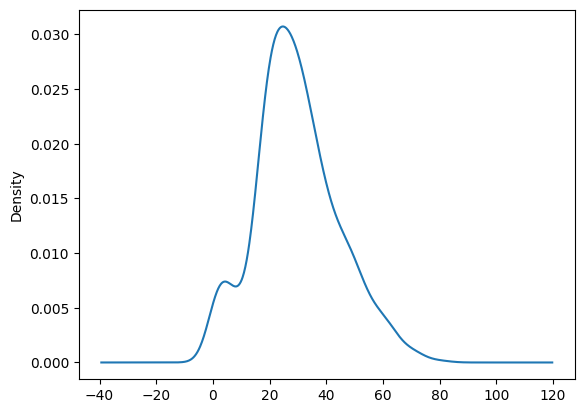

In [ ]:
df['Age'].plot(kind = 'kde')

In [ ]:
df['Age'].skew()

np.float64(0.38910778230082704)

<Axes: >

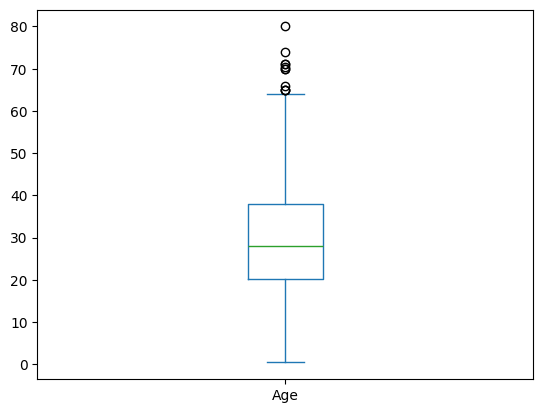

In [ ]:
df['Age'].plot(kind='box')

# Minimum → sabse chhoti value (outliers ke bina).

# Q1 (First Quartile) → 25% data iske neeche hota hai.

# Median (Q2) → beech ki value (50% data iske neeche hota hai).

# Q3 (Third Quartile) → 75% data iske neeche hota hai.

# Maximum → sabse badi value (outliers ke bina).

In [ ]:
df[df['Age']>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [ ]:
print(df['Age'].isnull().sum() / len(df['Age']))

0.19865319865319866


### Fare

conclusions

-The data is highly(positively) Skewed
-Fare col actually contains the group fare and not the the individual fare
(This might be the issue)
- we need to create a new col called individual fare

In [ ]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


Standard Deviation ek statistical measure hai jo batata hai ki data mean (average) ke around kitna spread ya variation hai.

Agar SD chhoti hai → data mean ke paas–paas hai (kam variation).

Agar SD badi hai → data bahut faila hua hai (high variation).  


Data Spread samajhne ke liye → Data tightly clustered hai ya wide spread hai.

Comparison → Do alag-alag groups ka data compare karne ke liye (kaunsa group zyada consistent hai).
      
Outlier Detection → Agar koi value mean ± 2SD ya 3SD se bahar hai, to wo outlier ho sakti hai.

Machine Learning me → Normalization, scaling, aur feature engineering ke liye standard deviation important hai.


<Axes: ylabel='Frequency'>

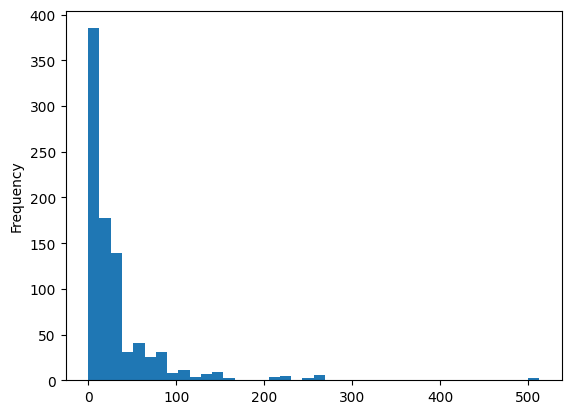

In [ ]:
df['Fare'].plot(kind='hist',bins=40)

<Axes: ylabel='Density'>

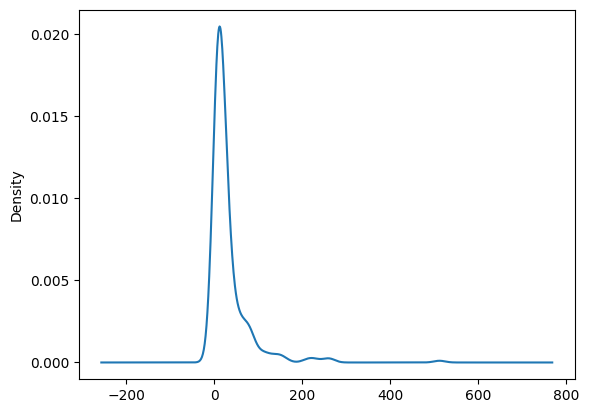

In [ ]:
df['Fare'].plot  (kind='kde')

In [ ]:

df['Fare'].skew()

np.float64(4.787316519674893)

<Axes: ylabel='Frequency'>

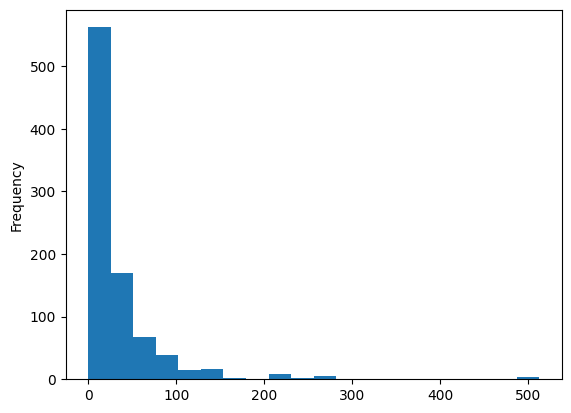

In [ ]:
df['Fare'].plot(kind='hist',bins=20)

<Axes: >

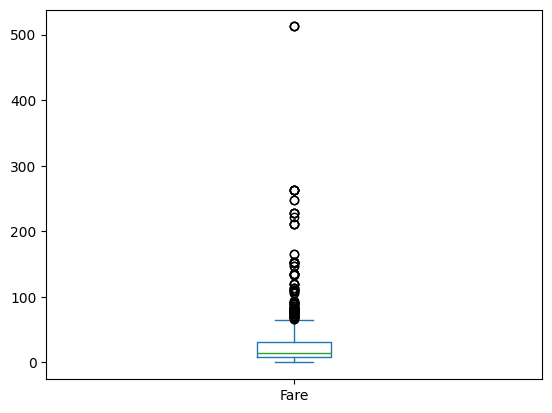

In [ ]:
df['Fare'].plot(kind='box')

In [ ]:
df[df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [ ]:
df[df['Fare']>250].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S


In [ ]:
df['Fare'].isnull().sum()

np.int64(0)

Steps of doing univariate analysis on categorical columns

Identify categorical variable → Frequency → Percentages → Visualization → Mode → Cardinality → Rare values → Handle missing → Summarize insights


Visualization = count plot and pie plot

## Survied col
**Conclusions

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: ylabel='count'>

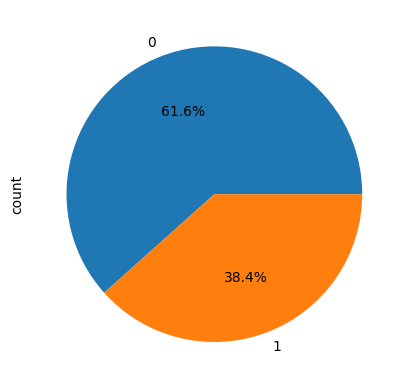

In [ ]:
df['Survived'].value_counts().plot(kind='pie',autopct='%1.1f%%')


In [ ]:
df['Survived'].isnull().sum()

np.int64(0)

In [ ]:
df['Pclass'].value_counts()


,count
Pclass,
3,491
1,216
2,184


<Axes: ylabel='count'>

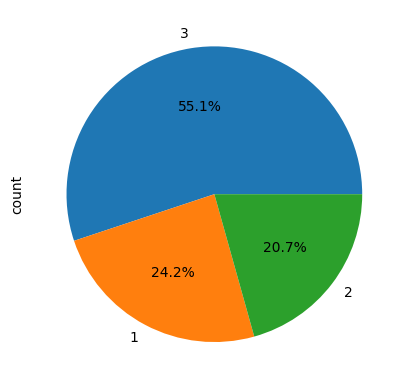

In [ ]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%1.1f%%')


##pclass sconclusion


pclass= suprisinly more people travel in p class 1 and pclass 2

<Axes: xlabel='Pclass'>

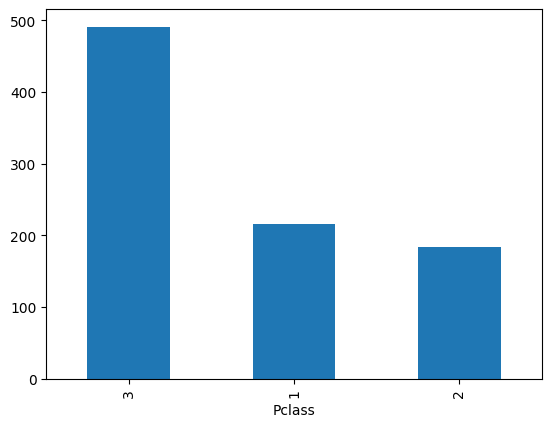

In [ ]:
df['Pclass'].value_counts().plot(kind='bar')



#Sex ration conclusions=
normal case scenario with 0 missing value in the data set


<Axes: ylabel='count'>

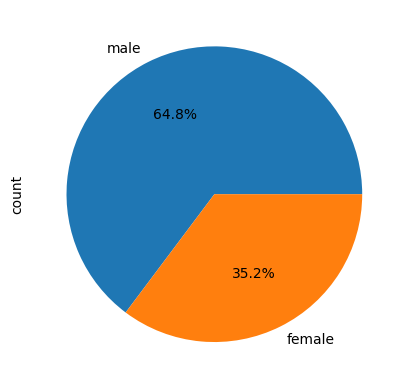

In [ ]:
df['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Sex'>

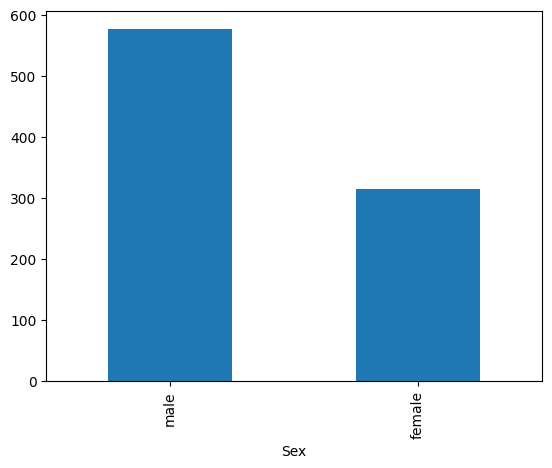

In [ ]:
df['Sex'].value_counts().plot(kind='bar')

In [ ]:
df['Sex'].isnull().sum()

np.int64(0)

In [ ]:
df['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


<Axes: ylabel='count'>

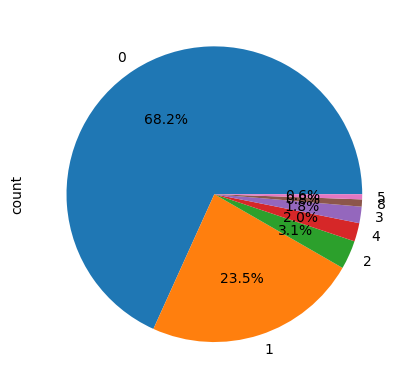

In [ ]:
df['SibSp'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='SibSp'>

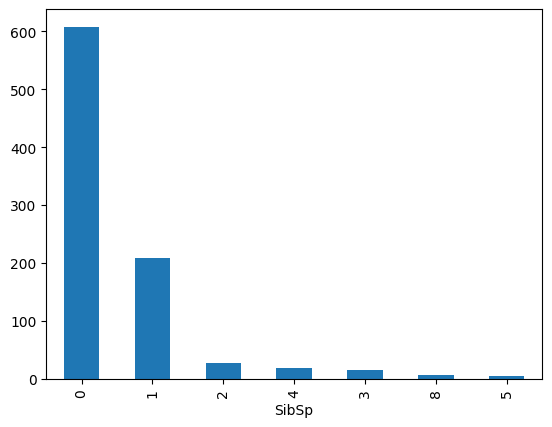

In [ ]:
df['SibSp'].value_counts().plot(kind='bar')

In [ ]:
df['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


<Axes: ylabel='count'>

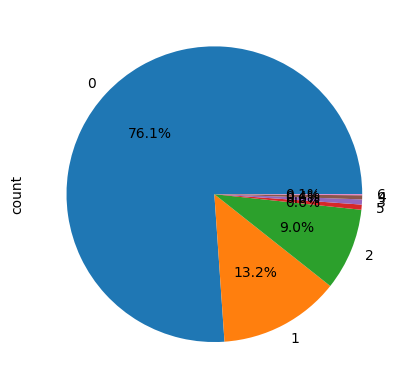

In [ ]:
df['Parch'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Parch'>

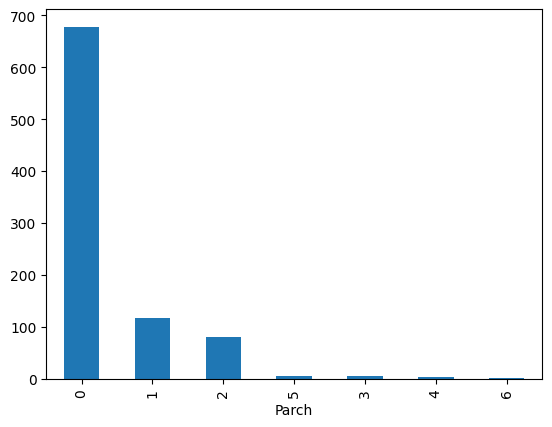

In [ ]:
df['Parch'].value_counts().plot(kind='bar')

### parentchild and sibsp can be merged to form a new col call family_size
-create a new col called is_alone

S= south hampton
c = cuborgh
q=queen town

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


<Axes: ylabel='count'>

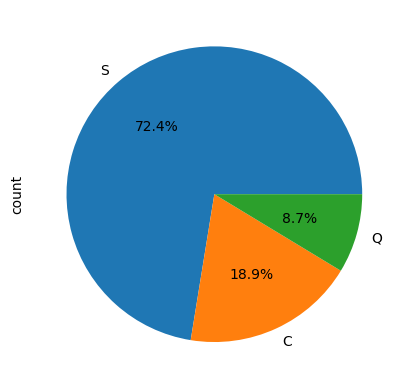

In [ ]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Mixed col
need to feature eng. to mixed col to get more insight

Select two col understand the type
1.NUM-NUM
---> plots like scatterplot,hist 2D , 2D kde
---.check corelation coefficeint to check linear relationship
2.NUM-categorical
---> create visualization and compare the distribution of the numerical data across different categories of the categorical data
--> plot like barplot,boxplot,kdeplot
3.categorical-categorical data
---> Draw contengency table
-->you can cplot heatmap,stacked barplots,treemaps

In [ ]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.shape

(891, 12)

ideally sabse imp col ko pakadte h then uska bivariate analysis karte h haar col ke sath

contingency table


In [ ]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100 # normalize me daal skate h col,index and trues

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

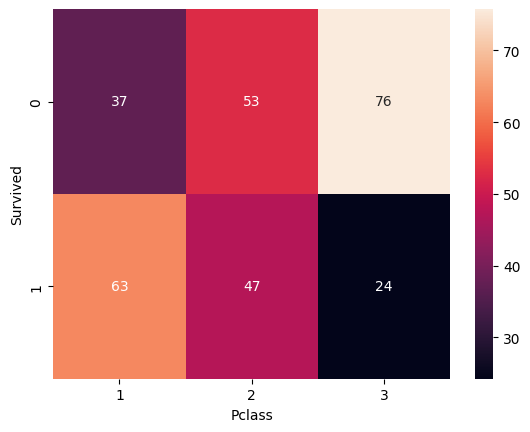

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100 ,annot=True)# normalize me daal skate h col,index and trues


<Axes: xlabel='Sex', ylabel='Survived'>

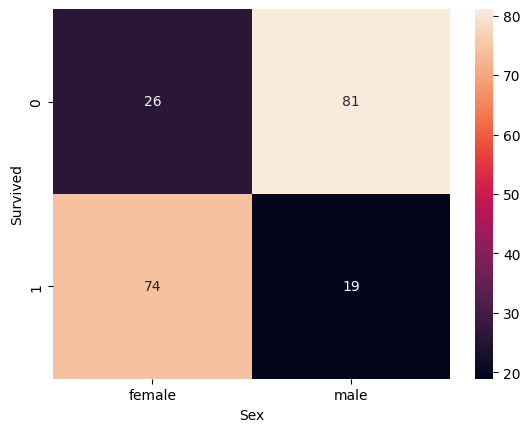

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100 ,annot=True)# normalize me daal skate h col,index and trues


In [ ]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Embarked', ylabel='Survived'>

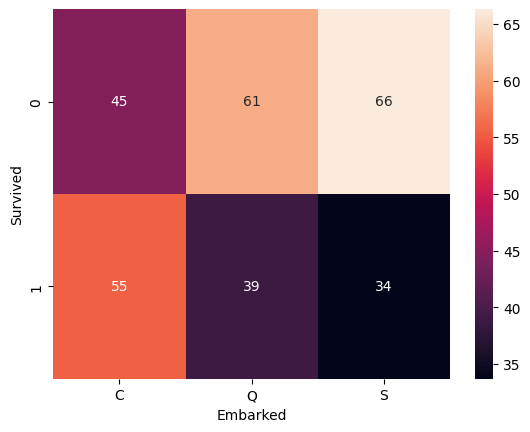

In [ ]:
sns.heatmap(pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100 ,annot=True)

In [ ]:
pd.crosstab(df['Survived'],df['Embarked'],normalize='columns')*100


Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<Axes: xlabel='Embarked', ylabel='Sex'>

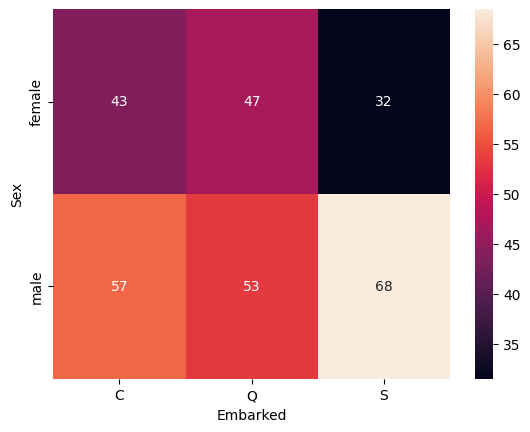

In [ ]:
sns.heatmap(pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100 ,annot=True)

In [ ]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [ ]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


<Axes: xlabel='Embarked', ylabel='Pclass'>

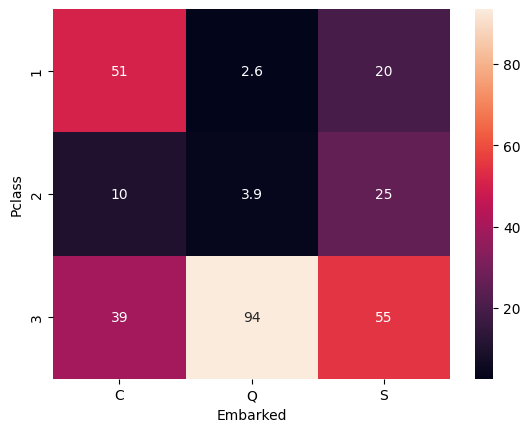

In [ ]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100 ,annot=True)

conclusion is like that irrespective of the gender and the embarked the more no. of the people die because of the passenger class the Pclass 3 people or died more compare or 1,2 and the passenger the pclass 3 who is male has the very less survival probability

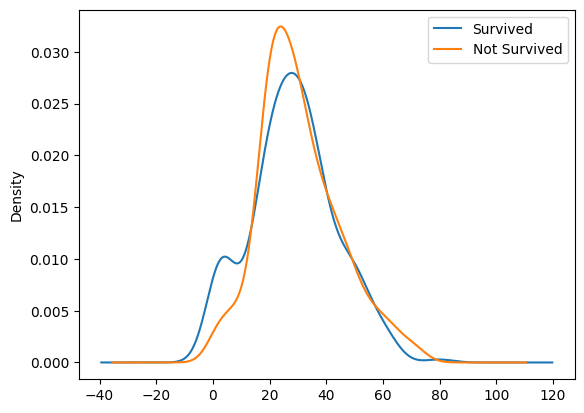

In [ ]:
#relationship between the age and survived

df[df['Survived']==1]['Age'].plot(kind='kde',label='Survived')
df[df['Survived']==0]['Age'].plot(kind='kde',label='Not Survived')
plt.legend()
plt.show()

##A legend is the little box on a plot that tells you which line/bar/point represents what.

# Example: If you draw two lines (sales in 2023 vs 2024), the legend helps differentiate them.

In [ ]:
df[df['Pclass']==1]['Age'].mean()

np.float64(38.233440860215055)

In [ ]:
df['surname']= df['Name'].str.split(',').str.get(0)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


In [ ]:
df['title']= df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [ ]:
df['title'].value_counts()

,count
title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Col.,2
Mlle.,2
Major.,2


In [ ]:
df['title'] = df['title'].str.replace('Rev.','other')
df['title'] = df['title'].str.replace('Dr.','other')
df['title'] = df['title'].str.replace('Col.','other')
df['title'] = df['title'].str.replace('Major.','other')
df['title'] = df['title'].str.replace('Capt.','other')
df['title'] = df['title'].str.replace('the','other')
df['title'] = df['title'].str.replace('Jonkheer.','other')
# ,'Dr.','Col.','Major.','Don.','Capt.','the','Jonkheer.']

AttributeError: Can only use .str accessor with string values!